## 4.1 - Differentiation

### 4.1.1 - Numeric solution

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

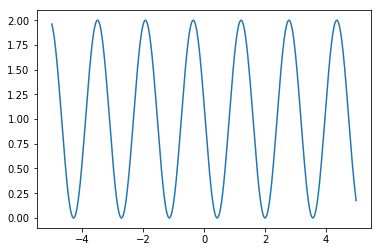

In [3]:
a, b, c, d = 1.0, 4.0, 3.0, 1.0
arr = (a, b, c, d)
dstep = 0.01
x = np.arange(-5, 5, dstep)
y = f(x, *arr)
plt.plot(x, y)
plt.show()

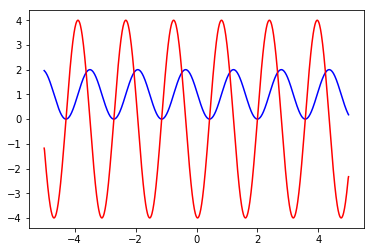

In [4]:
plt.plot(x, y, color='b')
plt.plot(x, np.gradient(y, dstep), color='r')
plt.show()

### 4.1.2 - Analytic (Symbolic) solution

Symbolic calculus is also a world of its own. We'll leave it to you to figure it out, check here:

In [5]:
import webbrowser
webbrowser.open('http://docs.sympy.org/latest/modules/solvers/solvers.html')

True

In [6]:
import sympy as sp
from scipy.misc import derivative
from sympy.parsing.sympy_parser import parse_expr

In [7]:
x = sp.Symbol('x')

In [8]:
eq = '3*x**2 + 2*x - 5'
sp.diff(eq)

6*x + 2

In [9]:
sympy_exp = parse_expr(eq)

In [10]:
sympy_exp.evalf(subs={x:1})

0.e-124

In [11]:
##Directly get the derivative
deriv_eq = parse_expr(str(sp.diff(eq)))
deriv_eq.evalf(subs={x:0})

2.00000000000000

In [12]:
#Alternatively, define a simple function
#Numerical derivative value
def f(x):
    return 3*x**2 + 2*x - 5

In [15]:
#If you have a function defined as f:
derivative(f, 0)

2.0

In [16]:
#Example with trig functions
eq2 = '2*x*sin(x)**2'
sp.diff(eq2)

4*x*sin(x)*cos(x) + 2*sin(x)**2

### Practical example: Error analysis for the Experimental Physics courses

In [17]:
import sympy as sp

$$ f(a,b,c) = k \frac{a b^{2}}{c^{2}} $$

In [18]:
eq = 'k*a*b**2/c**2'
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')
k = sp.Symbol('k')

The next example needs the individual error multiplied in each paramter, but we're going to assume they're all unity just for the sake of the readability of the example

In [20]:
errlin = sp.diff(eq, a) + sp.diff(eq, b) + sp.diff(eq, c)
print(errlin)
print(sp.simplify(errlin))

-2*a*b**2*k/c**3 + 2*a*b*k/c**2 + b**2*k/c**2
b*k*(-2*a*b + c*(2*a + b))/c**3


In [21]:
errsq = sp.sqrt( sp.diff(eq, a)**2 + sp.diff(eq, b)**2 + sp.diff(eq, c)**2 )
print(errsq)
print(sp.simplify(errsq))

sqrt(4*a**2*b**4*k**2/c**6 + 4*a**2*b**2*k**2/c**4 + b**4*k**2/c**4)
sqrt(b**2*k**2*(4*a**2*b**2 + c**2*(4*a**2 + b**2))/c**6)


In [22]:
print(sp.latex(errsq))

\sqrt{\frac{4 a^{2} b^{4} k^{2}}{c^{6}} + \frac{4 a^{2} b^{2} k^{2}}{c^{4}} + \frac{b^{4} k^{2}}{c^{4}}}


$$\sqrt{\frac{4 a^{2}}{c^{6}} b^{4} k^{2} + \frac{4 a^{2}}{c^{4}} b^{2} k^{2} + \frac{b^{4} k^{2}}{c^{4}}}$$

In [23]:
errlin.evalf(subs={a:1, b:2, c:3, k:1})

0.592592592592593

In [24]:
errsq.evalf(subs={a:1, b:2, c:3, k:1})

0.694876408862730

In [25]:
import webbrowser
url = 'http://www.scipy-lectures.org/advanced/sympy.html'
webbrowser.open(url)

True

### 4.1.3 - ODEs

$$ \tau \frac{\mathrm{d} y}{\mathrm{d} t} = -y + ku $$

In [26]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [27]:
def firstorder(y,t):
    tau = 5.0
    K= 2.0
    u = 1.0
    dydt = (-y + K*u)/tau    
    return dydt    

In [28]:
nsteps = 50
t = np.linspace(0,nsteps-1, nsteps)
y = odeint(firstorder, 0.0, t)

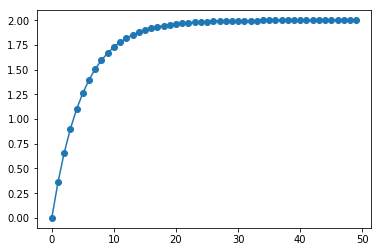

In [29]:
plt.plot(t, y, marker='o')
plt.show()

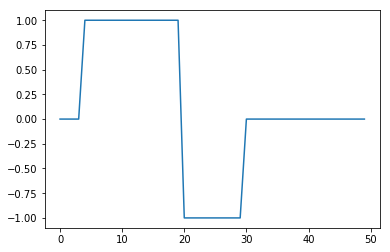

In [30]:
K = 2.0
u = np.zeros(nsteps)
u[4:] = 1.0
u[20:] = -1.0
u[30:] = 0.0
plt.plot(t,u)

In [31]:
def f_order(y,t,K,u):
    tau = 5.0
    dydt = (-y + K*u)/tau
    return dydt

In [32]:
ys = np.zeros(nsteps)
y0 = 0.0
ys[0] = y0
for i in range(nsteps-1):
    ts = [t[i], t[i+1]]
    y = odeint(f_order, y0, ts, args=(K, u[i]))
    y0 = y[1]
    ys[i] = y0

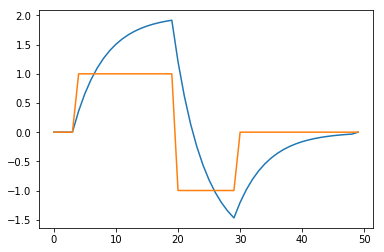

In [33]:
plt.plot(t,ys)
plt.plot(t,u)

## 4.2 - Integration

### 4.2.1 - Symbolic integration

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad, nquad

Define a function:

In [35]:
def f(x):
    return x**2 - 5.0*x - 8.0

In [36]:
x_min = -5.0
x_max = 10.0
x = np.arange(x_min, x_max, .1)

Make the next plot step by syep to remember spectators.

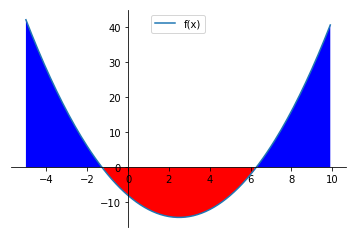

In [37]:
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, f(x), label='f(x)')
plt.legend(loc='upper center')
plt.fill_between(x, f(x), 0, where=f(x) >= 0, facecolor='blue')
plt.fill_between(x, f(x), 0, where=f(x) <= 0, facecolor='red')
plt.show()

In [39]:
I, err = quad(f, x_min, x_max)
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = 67.50000000000001
Error = 2.3550323351523795e-12


In [40]:
def g(x, a, b, c, d):
    return a*np.exp(-b*x+c)+d

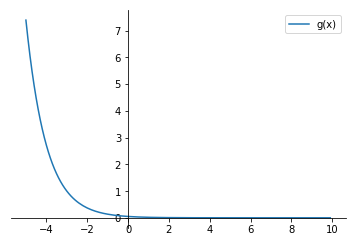

In [41]:
a = 1.0
b = 1.0
c = -3.0
d = 0.0
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, a, b, c, d), label='g(x)')
plt.legend()
plt.show()

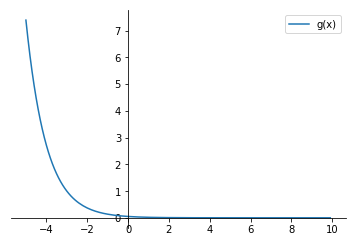

In [42]:
a = 1.0
b = 1.0
c = -3.0
d = 0.0
#Tupple with the function arguments
arr = (a, b, c, d)
#Start plotting
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, *arr), label='g(x)')
plt.legend()
plt.show()

In [44]:
I, err = quad(g, x_min, x_max, args=arr)
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = 7.389053838601245
Error = 2.7510477454461937e-09


Comparing the same function, but with different arguments:

In [45]:
arr1 = (1.0, 1.0, -3.0, -0.5)
arr2 = (1.0, 1.0, -3.0, 0.0)

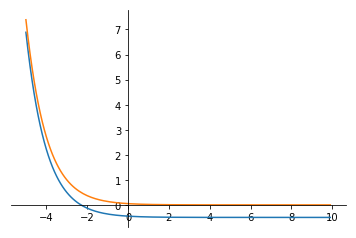

In [46]:
ax = plt.gca()
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.spines['top'].set_color(None)
ax.spines['right'].set_color(None)
plt.plot(x, g(x, *arr1))
plt.plot(x, g(x, *arr2))
plt.show()

In [47]:
I, err = quad(g, x_min, x_max, args=arr1)
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = -0.11094616139875546
Error = 2.7510475299941865e-09


In [48]:
I, err = quad(g, x_min, x_max, args=arr2)
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = 7.389053838601245
Error = 2.7510477454461937e-09


### 4.2.2 - Numerical integration from samples

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

In [50]:
x = np.linspace(0, 1, 10, endpoint=True)
y = x
yn = x + 0.1*np.random.randn(len(x))

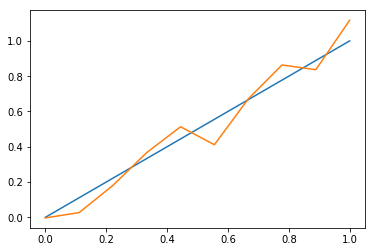

In [51]:
plt.plot(x ,y)
plt.plot(x ,yn)
plt.show()

In [52]:
print(np.trapz(yn, x=x))
print(integrate.trapz(yn, x=x))
print(integrate.simps(yn, x=x))

0.49206389052044364
0.49206389052044364
0.48975011902324056


## 2-D Integration

Now for a 2-D case:

In [53]:
def z(x, y):
    return np.cos(x)+np.sin(y)

In [54]:
x = np.arange(-3,3,.05)
y = np.arange(-3,3,.05)

In [55]:
x

array([-3.0000000e+00, -2.9500000e+00, -2.9000000e+00, -2.8500000e+00,
       -2.8000000e+00, -2.7500000e+00, -2.7000000e+00, -2.6500000e+00,
       -2.6000000e+00, -2.5500000e+00, -2.5000000e+00, -2.4500000e+00,
       -2.4000000e+00, -2.3500000e+00, -2.3000000e+00, -2.2500000e+00,
       -2.2000000e+00, -2.1500000e+00, -2.1000000e+00, -2.0500000e+00,
       -2.0000000e+00, -1.9500000e+00, -1.9000000e+00, -1.8500000e+00,
       -1.8000000e+00, -1.7500000e+00, -1.7000000e+00, -1.6500000e+00,
       -1.6000000e+00, -1.5500000e+00, -1.5000000e+00, -1.4500000e+00,
       -1.4000000e+00, -1.3500000e+00, -1.3000000e+00, -1.2500000e+00,
       -1.2000000e+00, -1.1500000e+00, -1.1000000e+00, -1.0500000e+00,
       -1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
      

In [56]:
X, Y = np.meshgrid(x, y)
X

array([[-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       ...,
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95],
       [-3.  , -2.95, -2.9 , ...,  2.85,  2.9 ,  2.95]])

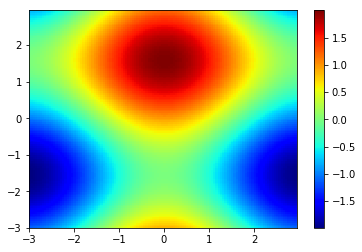

In [57]:
plt.pcolor(X, Y, z(X, Y), cmap='jet')
plt.colorbar()
plt.show()

Put this example in 3D

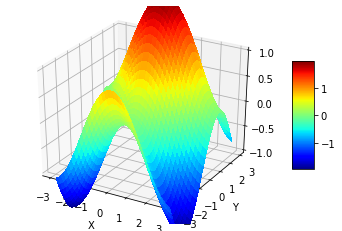

In [58]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, z(X, Y), cmap='jet',
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)

plt.xlabel('X')
plt.ylabel('Y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [59]:
I, err = nquad(z, [[-3, 3],[-3, 3]])
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = 1.6934400967184076
Error = 2.6428245051366776e-13


Can we do something more complicated?

Consider (from the scipy example):

$$\Large{I_N = \int_{0}^{+\infty}\int_{1}^{+\infty} \frac{e^{-xt}}{t^{N}} \mathrm{d}t\mathrm{d}x}$$

In [60]:
N = 10.0
def f2(t, x):
    return np.exp(-x*t)/(t**N)

I, err = nquad(f2, [[1, np.inf],[0, np.inf]])
print("Integral = "+str(I))
print("Error = "+str(err))

Integral = 0.09999999999998103
Error = 1.2479337063157417e-09
